In [1]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


In [4]:
from google.colab import drive


Mounted at /content/drive


In [14]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
datapath = os.path.join("datasets", "healthout")

In [2]:
# Download the data
import pandas as pd
url = "https://raw.githubusercontent.com/abiola1864/ML4Development/main/finaldata/rwan_2015.csv"
df = pd.read_csv(url,
                             encoding='latin1', na_values="n/a")
print(df.sample(5))

       Unnamed: 0  hw10_1  v457  ...  Wet_Days_2015  hw10_1_imp  v457_imp
9750         9751    1175   0.0  ...      16.532499        True     False
4447         4448     991   0.0  ...      15.219999        True      True
2163         2164    1037   0.0  ...      15.912499        True      True
10321       10322    1116   0.0  ...      15.849167        True      True
5701         5702     602   0.0  ...      15.633333        True      True

[5 rows x 142 columns]


In [3]:
df.rename(columns={"Nightlights_Composite": "NL"}, inplace=True)


In [4]:
df = df.dropna()

In [50]:
import numpy
X = df['NL'].values.reshape (-1, 1) #reshape to get a one-dimensional column array
y = df['v467c'].values.reshape (-1, 1)#reshape to get a one-dimensional column array

X.shape


(12926, 1)

**splitting the data**

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**getting a baseline**

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [43]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse


0.4861702127659161

In [44]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse


0.4760247486465255

**I get 0.48 for trained, and 0.47 for test data**

In [46]:
import numpy as np

np.sqrt(mse)

0.6899454678788212

**A bit of visualization but not useful**

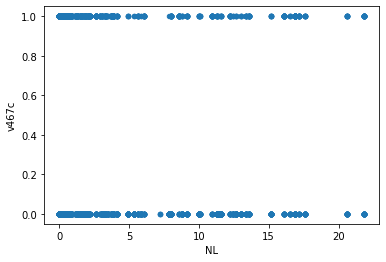

In [193]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
X = np.c_[df['NL']]
y = np.c_[df['v467c']]

# Visualize the data
df.plot(kind='scatter', x="NL", y='v467c')
plt.show()


**Using SVR to get a non-linear baseline**

In [47]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform


rbf_svr = SVR()
rbf_svr.fit(X_train_scaled, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
from sklearn.metrics import mean_squared_error
y_pred = rbf_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

0.34828650251403603

**The result shows 0.34**

In [49]:
np.sqrt(mse)

0.590158031813544

In [203]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.005, 0.1), "C": uniform(51, 10)}


In [206]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=54.74540118847362, gamma=0.08627358286640177 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=54.74540118847362, gamma=0.08627358286640177, total=   4.1s
[CV] C=54.74540118847362, gamma=0.08627358286640177 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=54.74540118847362, gamma=0.08627358286640177, total=   4.4s
[CV] C=54.74540118847362, gamma=0.08627358286640177 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=54.74540118847362, gamma=0.08627358286640177, total=   4.2s
[CV] C=58.31993941811405, gamma=0.030049873591901567 .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=58.31993941811405, gamma=0.030049873591901567, total=   3.8s
[CV] C=58.31993941811405, gamma=0.030049873591901567 .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=58.31993941811405, gamma=0.030049873591901567, total=   4.2s
[CV] C=58.31993941811405, gamma=0.030049873591901567 .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=58.31993941811405, gamma=0.030049873591901567, total=   4.0s
[CV] C=52.560186404424364, gamma=0.007978542347074177 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=52.560186404424364, gamma=0.007978542347074177, total=   3.7s
[CV] C=52.560186404424364, gamma=0.007978542347074177 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=52.560186404424364, gamma=0.007978542347074177, total=   3.7s
[CV] C=52.560186404424364, gamma=0.007978542347074177 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=52.560186404424364, gamma=0.007978542347074177, total=   3.7s
[CV] C=51.580836121682, gamma=0.06697167353375241 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=51.580836121682, gamma=0.06697167353375241, total=   3.8s
[CV] C=51.580836121682, gamma=0.06697167353375241 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=51.580836121682, gamma=0.06697167353375241, total=   4.3s
[CV] C=51.580836121682, gamma=0.06697167353375241 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=51.580836121682, gamma=0.06697167353375241, total=   3.8s
[CV] C=57.01115011743209, gamma=0.04170553216181043 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=57.01115011743209, gamma=0.04170553216181043, total=   4.5s
[CV] C=57.01115011743209, gamma=0.04170553216181043 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=57.01115011743209, gamma=0.04170553216181043, total=   3.7s
[CV] C=57.01115011743209, gamma=0.04170553216181043 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=57.01115011743209, gamma=0.04170553216181043, total=   4.1s
[CV] C=51.205844942958024, gamma=0.0913801391589286 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=51.205844942958024, gamma=0.0913801391589286, total=   4.3s
[CV] C=51.205844942958024, gamma=0.0913801391589286 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=51.205844942958024, gamma=0.0913801391589286, total=   3.9s
[CV] C=51.205844942958024, gamma=0.0913801391589286 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=51.205844942958024, gamma=0.0913801391589286, total=   4.0s
[CV] C=59.324426408004214, gamma=0.009445600138094694 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=59.324426408004214, gamma=0.009445600138094694, total=   3.5s
[CV] C=59.324426408004214, gamma=0.009445600138094694 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=59.324426408004214, gamma=0.009445600138094694, total=   4.1s
[CV] C=59.324426408004214, gamma=0.009445600138094694 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=59.324426408004214, gamma=0.009445600138094694, total=   3.7s
[CV] C=52.818249672071005, gamma=0.008661333735273127 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=52.818249672071005, gamma=0.008661333735273127, total=   3.7s
[CV] C=52.818249672071005, gamma=0.008661333735273127 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=52.818249672071005, gamma=0.008661333735273127, total=   3.8s
[CV] C=52.818249672071005, gamma=0.008661333735273127 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=52.818249672071005, gamma=0.008661333735273127, total=   3.6s
[CV] C=54.042422429595376, gamma=0.024082072654535415 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=54.042422429595376, gamma=0.024082072654535415, total=   3.8s
[CV] C=54.042422429595376, gamma=0.024082072654535415 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=54.042422429595376, gamma=0.024082072654535415, total=   3.9s
[CV] C=54.042422429595376, gamma=0.024082072654535415 ................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=54.042422429595376, gamma=0.024082072654535415, total=   4.1s
[CV] C=55.31945018642116, gamma=0.011963764382790317 .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=55.31945018642116, gamma=0.011963764382790317, total=   3.7s
[CV] C=55.31945018642116, gamma=0.011963764382790317 .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=55.31945018642116, gamma=0.011963764382790317, total=   3.7s
[CV] C=55.31945018642116, gamma=0.011963764382790317 .................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=55.31945018642116, gamma=0.011963764382790317, total=   3.6s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.0min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efe282ce6d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efe299fbb10>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

**Finally Test after randomized search**

In [207]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5936720722212894

In [208]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5950606932144155